<a href="https://colab.research.google.com/github/musa-fe/Golden_Fibo/blob/main/GoldenFibo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fibonacci Düzeltme Seviyeleri ve Altın Oran
Ben bu projede teknik analiz kısmında kullanılan fib düzeltmesini seçtim. Çünkü altın oran ve altın oranın türevlerinden oluşan seviyelerden oluşuyor.

Bu seviyelerden en bilinen ve en çok dikkat çeken oran %61.8. Bu oran, altın oranla doğrudan ilişkilidir. Yani, Fibonacci dizisindeki iki ardışık sayının oranı alındığında (örneğin, 34/55) bu değer %61.8 olarak karşımıza çıkar. Altın oran, doğanın birçok yerinde karşımıza çıkan estetik bir orandır, bu yüzden finans dünyasında da çok fazla ilgi görüyor.

Diğer düzeltme seviyelerine gelirsek, bunlar aslında %61.8’in etrafında dönen ve onun türevleri gibi düşünebiliriz:

%38.2: Bu oran, altın oranın bir parçası. Dizi üzerindeki sayılardan biriyle ilişkili olarak hesaplanıyor.
%23.6: Yine Fibonacci dizisindeki başka bir sayı kombinasyonundan geliyor ve aslında %38.2'nin devamı gibi düşünebiliriz.
%78.6: Bu seviye de %61.8’in bir uzantısı. Yani %100’den %61.8 çıkarılıyor ve bu oran çıkıyor.

Şimdi bu projede bu seviyeleri test edip çalışıp çalışmadığını anlamaya çalışacağız.

In [103]:
def calculate_fibonacci_levels(high, low, direction='down'):
    if direction == 'down':
        return {
            0.236: high - 0.236 * (high - low),
            0.382: high - 0.382 * (high - low),
            0.5:   high - 0.5 * (high - low),
            0.618: high - 0.618 * (high - low),
            0.786: high - 0.786 * (high - low)
        }
    else:
        return {
            0.236: low + 0.236 * (high - low),
            0.382: low + 0.382 * (high - low),
            0.5:   low + 0.5 * (high - low),
            0.618: low + 0.618 * (high - low),
            0.786: low + 0.786 * (high - low)
        }

In [116]:
def say_temassayisi(close_series, level_price, fark=50):
    temas_sayisi = 0
    icerde = False
    close_series = close_series.values
    for fiyat in close_series:
        if level_price - fark <= fiyat <= level_price + fark:
            if not icerde:
                temas_sayisi += 1
                icerde = True
        else:
            icerde = False
    return temas_sayisi

In [117]:
symbol = "BTC-USD"
data = yf.download(symbol, start="2024-11-10", end="2025-04-10")

if data.empty:
    raise ValueError("Veri çekilemedi, tarih aralığını veya sembolü kontrol edin.")

[*********************100%***********************]  1 of 1 completed


In [118]:
high = float(data['High'].max())
low = float(data['Low'].min())
close_start = float(data['Close'].iloc[0])
close_end = float(data['Close'].iloc[-1])
trend = 'up' if close_end > close_start else 'down'
levels = calculate_fibonacci_levels(high, low, direction=trend)

<ipython-input-118-5431aacc9843>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  high = float(data['High'].max())
<ipython-input-118-5431aacc9843>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  low = float(data['Low'].min())
<ipython-input-118-5431aacc9843>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_start = float(data['Close'].iloc[0])
<ipython-input-118-5431aacc9843>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_end = float(data['Close'].iloc[-1])


In [119]:
trend = 'up' if close_end > close_start else 'down'
levels = calculate_fibonacci_levels(high, low, direction=trend)

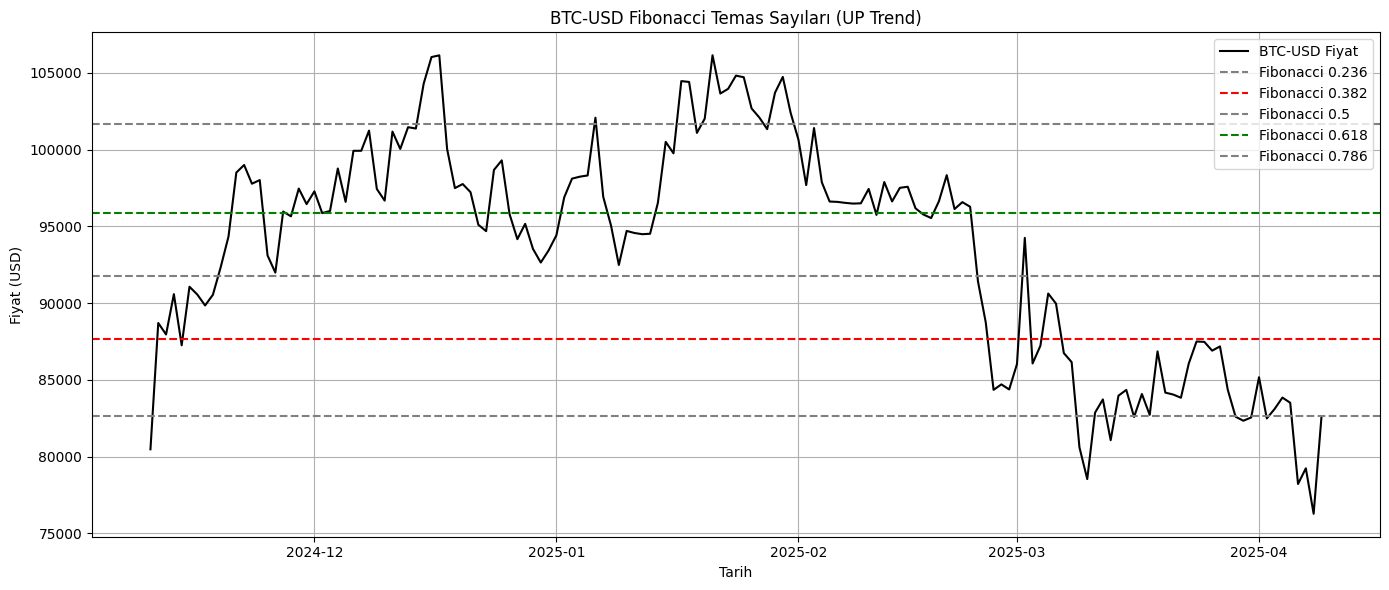

In [120]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label=f"{symbol} Fiyat", color='black')

temas_istatistik = {}

for level, price in levels.items():
    color = 'green' if level == 0.618 else 'red' if level == 0.382 else 'gray'
    plt.axhline(price, label=f"Fibonacci {level}", linestyle="--", color=color)
    temas_sayisi = say_temassayisi(data['Close'], price, fark=50)
    temas_istatistik[level] = temas_sayisi

plt.title(f"{symbol} Fibonacci Temas Sayıları ({trend.upper()} Trend)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [121]:
print("--- TEMAS SAYILARI (±50 USD) ---")
for level, sayi in temas_istatistik.items():
    print(f"Fibonacci {level} → {sayi} defa test edilmiş.")


--- TEMAS SAYILARI (±50 USD) ---
Fibonacci 0.236 → 3 defa test edilmiş.
Fibonacci 0.382 → 0 defa test edilmiş.
Fibonacci 0.5 → 0 defa test edilmiş.
Fibonacci 0.618 → 1 defa test edilmiş.
Fibonacci 0.786 → 0 defa test edilmiş.


Güncel grafiktende teyit ettiğimizde, çektiğimiz fib düzeltmesinin ve fiyatların doğru olduğunu gözlemliyoruz

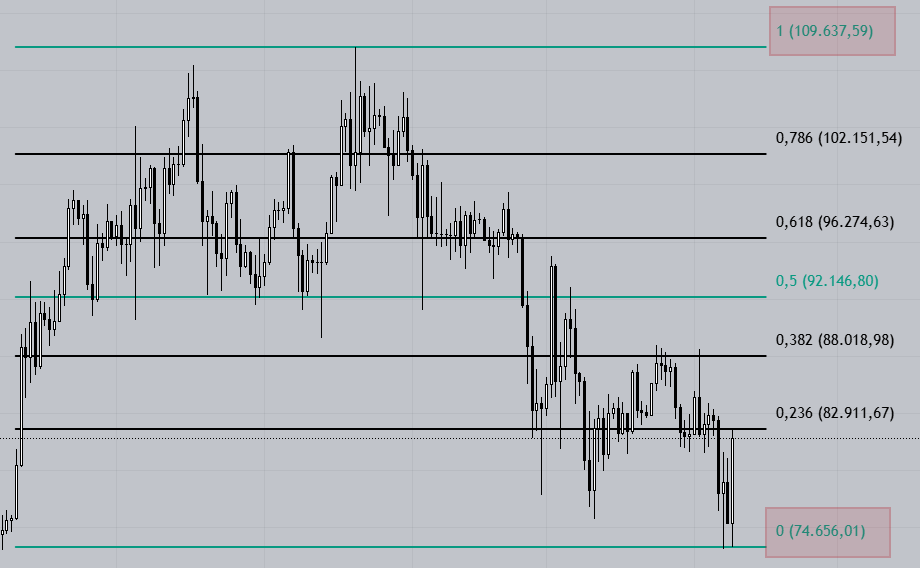